Cell 1: Ця комірка імпортує всі необхідні бібліотеки.


In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Cell 2: Завантаження даних
Прочитаємо CSV-файл і перевіримо, чи коректно завантажились дані.


In [11]:
# Завантажуємо дані
df = pd.read_csv("expenses.csv")

# Переконаємося, що дані числові
df = df.dropna()  # Видаляємо можливі пропущені значення
data = df["Income/Spendings"].astype(float)

# Перевіряємо перші 5 рядків
df.head()

,Income/Spendings
0,-386.0
1,-32.0
2,-41.0
3,-39.0
4,-33.0


Cell 3: Kolmogorov-Smirnov test
Тест Колмогорова-Смірнова порівнює емпіричний розподіл даних із нормальним.
Що означає statistic?

statistic – це максимальна різниця між теоретичним (нормальним) розподілом і фактичним розподілом даних.
Якщо statistic велике → дані сильно відрізняються від нормального розподілу.
Якщо statistic мале → дані схожі на нормальний розподіл.
p-value показує, чи є відмінності статистично значущими (якщо p < 0.05, дані НЕ є нормальними).


In [12]:
# 1. Тест Колмогорова-Смірнова
ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data, ddof=1)))

print(f"Kolmogorov-Smirnov test: statistic={ks_stat:.4f}, p-value={ks_p:.4f}")


Kolmogorov-Smirnov test: statistic=0.2153, p-value=0.0379


Cell 4: QQ-plot (візуальна перевірка нормальності)
Квантильний графік (QQ-plot) показує, наскільки дані відповідають нормальному розподілу.
Як інтерпретувати графік?

Якщо точки лежать приблизно на прямій лінії → дані нормально розподілені.
Якщо є вигини або точки сильно відхиляються → розподіл НЕ нормальний.


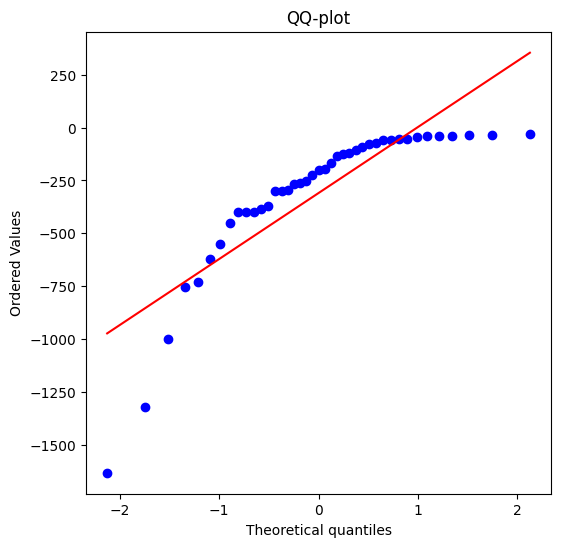

In [13]:
# 2. QQ-plot для візуальної оцінки нормальності
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ-plot")
plt.show()

Cell 5: Shapiro-Wilk test
Шапіро-Уілк тест – ще один спосіб перевірити нормальність даних.
🔹 Що означає statistic?

statistic – чим ближче до 1, тим більше дані схожі на нормальний розподіл.
p-value > 0.05 → нормальний розподіл.
p-value < 0.05 → розподіл НЕ нормальний.


In [14]:
# 3. Тест Шапіро-Уілка
shapiro_stat, shapiro_p = stats.shapiro(data)

print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")


Shapiro-Wilk test: statistic=0.7468, p-value=0.0000


Cell 6: Гістограма та щільність розподілу
Побудуємо гістограму і Kernel Density Estimate (KDE), щоб подивитися на форму розподілу.


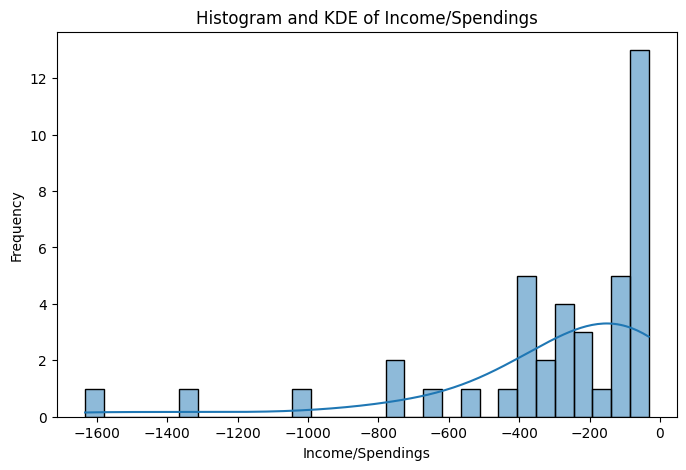

In [15]:
# Додатковий аналіз – гістограма та графік щільності
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=30)
plt.title("Histogram and KDE of Income/Spendings")
plt.xlabel("Income/Spendings")
plt.ylabel("Frequency")
plt.show()

Cell 7: Висновок
Остаточно вирішуємо, чи нормально розподілені дані, базуючись на тестах.


In [16]:
if ks_p > 0.05 and shapiro_p > 0.05:
    print("Дані можуть бути нормальними (не відхиляємо нульову гіпотезу).")
else:
    print("Дані НЕ є нормально розподіленими (відхиляємо нульову гіпотезу).")


Дані НЕ є нормально розподіленими (відхиляємо нульову гіпотезу).


Ми бачемо, що данні схожі на еспоненціальний розподіл


Cell 8: Kolmogorov-Smirnov тест для експоненціального розподілу
В експоненційному розподілі основний параметр – λ (lambda), який є зворотним середньому значенню вибірки:

𝜆=1/mean(𝑑𝑎𝑡𝑎)​

Ось як виконати тест Колмогорова-Смірнова для експоненціального розподілу:


In [17]:
# Конвертуємо всі значення у додатні
data_positive = np.abs(data)  # Беремо модуль кожного значення

# Оцінюємо λ (інтенсивність експоненційного розподілу)
lambda_est = 1 / np.mean(data_positive)

# Тест Колмогорова-Смірнова для експоненційного розподілу
ks_stat_exp, ks_p_exp = stats.kstest(data_positive, 'expon', args=(0, 1/lambda_est))

print(f"Kolmogorov-Smirnov test for exponential distribution:")
print(f"Statistic={ks_stat_exp:.4f}, p-value={ks_p_exp:.4f}")




Kolmogorov-Smirnov test for exponential distribution:
Statistic=0.0982, p-value=0.7884


Cell 9: Додатково: QQ-plot для експоненціального розподілу
Для візуальної перевірки можна побудувати QQ-plot:


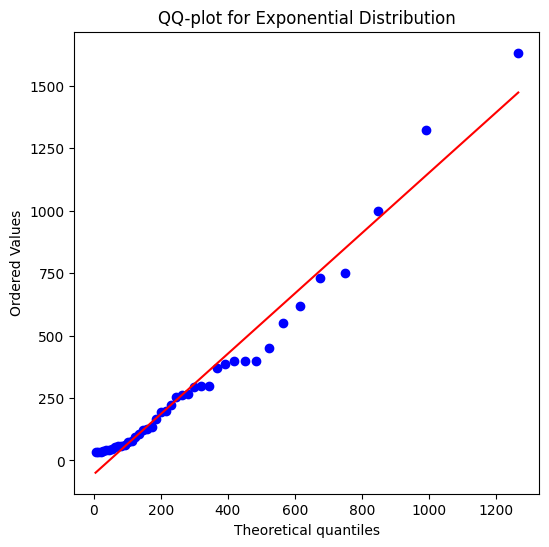

In [18]:
# QQ-plot для експоненціального розподілу
plt.figure(figsize=(6, 6))
stats.probplot(data_positive, dist="expon", sparams=(0, 1/lambda_est), plot=plt)
plt.title("QQ-plot for Exponential Distribution")
plt.show()

📌 Висновок за результатами перевірки
Kolmogorov-Smirnov Test

Якщо p-value > 0.05, то ми не можемо відхилити гіпотезу, що розподіл експоненційний → ймовірно, дані мають експоненційний розподіл.
Якщо p-value < 0.05, то ми відхиляємо гіпотезу, що дані експоненційні → розподіл НЕ експоненційний.
Значення statistic показує максимальну різницю між емпіричним і теоретичним розподілом: чим менше, тим краще відповідність.
QQ-Plot

Якщо точки лежать на прямій → розподіл добре підходить до експоненційного.
Якщо точки відхиляються (особливо в хвостах) → є значні відмінності від експоненційного розподілу.
Якщо обидва методи показують, що дані не експоненційні, то, можливо, потрібно перевірити інші розподіли (наприклад, логнормальний чи гамма-розподіл).
